#Conducting exploratory data analysis of the 2017 Primary School Leaving Examination (PSLE) Data.

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
from statsmodels.formula.api import ols
import seaborn as sns

Let's see what the CSV first looks like by calling the .head() method. 

We notice the features in the dataset: the candidate number, their sex (Female is 1), subject scores in integers 1-5 (E-A) with some NaNs for X values. NECTA, the examination body in Tanzania, generates Average Grade also as an integer. However, for more variation in scores, I added a calculated average feature. Note that the average grade is often the rounding of the calculated grade.
Finally, the candidate number codes the region that the student is from, as well as the district and school. Using regular expressions, I assigned Region and District values to each student when cleaning the data.

In [52]:
psle2017 = pd.read_csv("") #read in one of my necta psle data, this is for 2017
psle2017.head()

,CAND_NO,SEX,Kiswahili,English,Maarifa,Hisabati,Science,Average_Grade,CalcAverage,District,Region
0,PS0107001-001,0,4.0,1.0,2.0,1.0,3.0,2.0,2.2,NGORONGORO,ARUSHA
1,PS0107001-002,0,4.0,2.0,2.0,2.0,2.0,2.0,2.4,NGORONGORO,ARUSHA
2,PS0107001-003,0,4.0,2.0,2.0,2.0,2.0,2.0,2.4,NGORONGORO,ARUSHA
3,PS0107001-004,0,3.0,2.0,2.0,3.0,4.0,3.0,2.8,NGORONGORO,ARUSHA
4,PS0107001-005,0,3.0,2.0,3.0,2.0,3.0,3.0,2.6,NGORONGORO,ARUSHA


#Does your region determine your success in this exam?

First, I look at the distribution of the scores by region.

In [53]:
psle2017.groupby('Region')['CalcAverage'].describe().sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
GEITA,36977.0,3.377851,0.821793,1.0,2.8,3.4,4.0,5.0
DAR ES SALAAM,66691.0,3.322841,0.759160,1.0,2.8,3.2,3.8,5.0
KAGERA,41982.0,3.146177,0.760056,1.0,2.8,3.2,3.6,5.0
KILIMANJARO,36578.0,3.044529,0.696682,1.0,2.6,3.0,3.6,5.0
MWANZA,70354.0,3.036541,0.788146,1.0,2.4,3.0,3.6,5.0
NJOMBE,19142.0,3.029171,0.728299,1.0,2.6,3.0,3.6,5.0
ARUSHA,38296.0,3.019992,0.786739,1.0,2.4,3.0,3.6,5.0
IRINGA,24783.0,2.995561,0.629044,1.0,2.6,3.0,3.4,5.0
KATAVI,9384.0,2.955350,0.725643,1.0,2.4,3.0,3.4,4.8


Although helpful, the number of regions makes the statistical output hard to digest. We try a Boxplot below for more visual clarity on how regions compare.

Overall, if you compare 2017 to 2013 (I don't show that here, but feel free to run this analysis with 2013's dataset from my GitHub account as I did!), average and median scores have increased across all regions. I would be curious to test if the improvements in the 4-year span are authentic or engineered. Tanzania caused quite a stir some years back when a significant number of their students failed the exam. Parents were in an uproar and this may have caused the government to subsequently either change the difficulty of the exam, change how it grades the questions, or ultimately change what constitutes passing scores. This is taking a more skeptical/cynical lens in evaluating the scores, but given Tanzania's past volatile passing rates, the skepticism may be warranted. Nonetheless, our hope is that the results are genuine and a good benchmark for students' continuing education in secondary school.

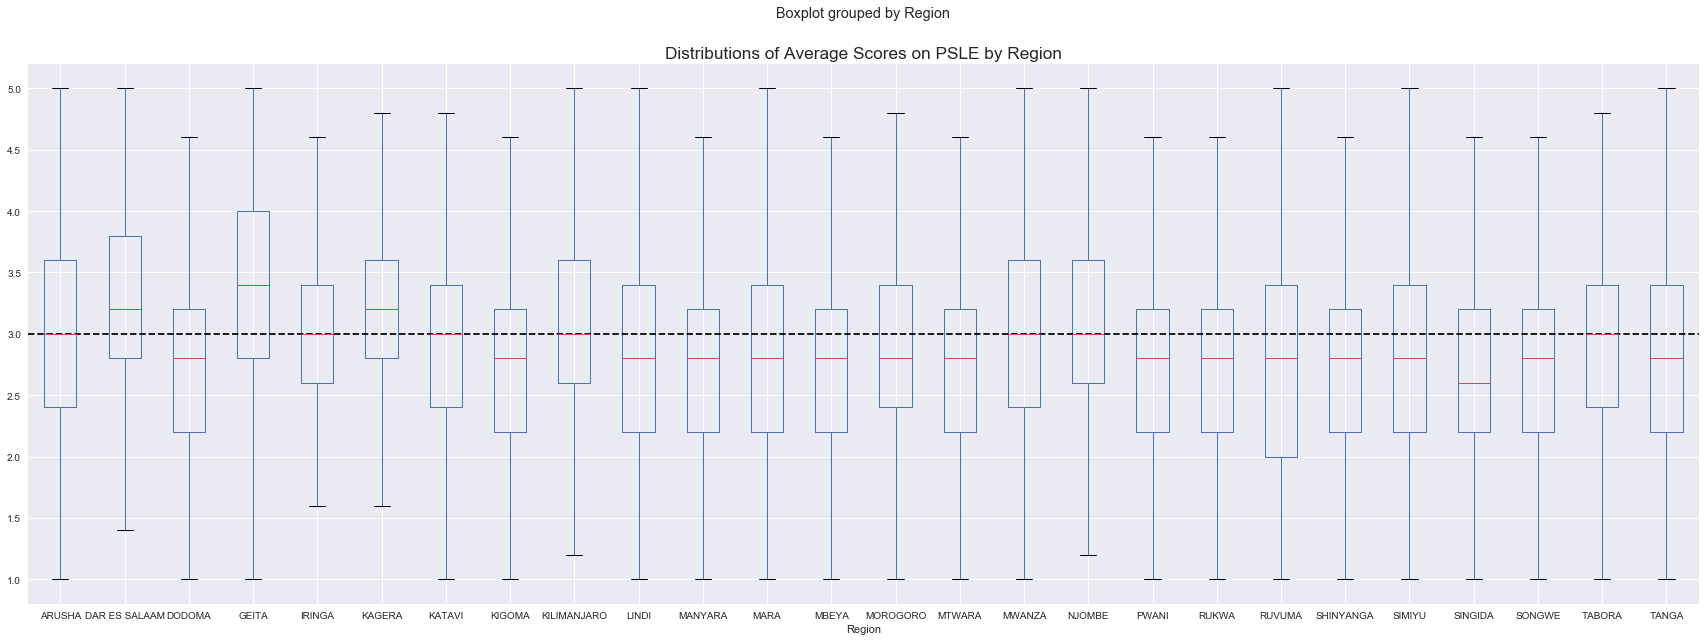

In [55]:
psle2017.boxplot(column='CalcAverage', by='Region', figsize=(29,10))
plt.axhline(y=3.0, color='black', linestyle='dashed')
plt.title("Distributions of Average Scores on PSLE by Region", fontsize='x-large')
plt.savefig("psle_distributions.jpg")
plt.show()

We're nearing the first statistical test for whether your region determines your performance on the PSLE. I conduct a one-way analysis of variance (ANOVA) using the regions as the groups. I do assume the data is mostly normal for each region and I conduct the test without outliers in case there was concern about them. The result appears to be statistically significant at p < 0.001 level in both cases. I imagine this intuitively makes sense. We are testing whether or not performance on the PSLE is equal across 25+ regions - we'd naturally expect variation.

In [20]:
ListOfRegions = psle2017['Region'].unique()
#region_dict = {x: psle2017[psle2017.Region == x]['CalcAverage'].dropna() for x in ListOfRegions}
region_values = [psle2017[psle2017.Region == x]['CalcAverage'].dropna() for x in ListOfRegions]

#region_values = []
# for k,v in region_dict.items():
#     region_values.append(v)

print(scipy.stats.f_oneway(*region_values))

#Repeating the test without outliers
psle2017_noOut = psle2017.dropna()[(np.abs(scipy.stats.zscore(psle2017['CalcAverage'].dropna())) < 3)]

region_values_2 = [psle2017_noOut[psle2017_noOut.Region == x]['CalcAverage'] for x in ListOfRegions]

print(scipy.stats.f_oneway(*region_values_2))

F_onewayResult(statistic=2417.0113629815164, pvalue=0.0)
F_onewayResult(statistic=2417.0113629815164, pvalue=0.0)


hamelg's blog has been particularly useful because while I knew I wanted to compare groups using ANOVA, I wasn't sure on the best practice for python. Coming from an SPSS background, this is both exciting and frustrating. The output was quick and easy with SPSS' GUI. Anyway, in keeping with hamelg's advice, I would check for which groups are driving this variance. I won't go into too much detail about the results of the code, but suffice it to say, the T-tests showed variation between many of the group combinations. So many in fact, that it may be more worthwhile to look at the regions which show potential for no significant variance.

In [ ]:
import itertools
region_pairs = list(itertools.combinations(ListOfRegions,2))

# Conduct t-test on each pair
for region1, region2 in region_pairs:
      print(region1, region2)
      print(scipy.stats.ttest_ind(psle2017_noOut[psle2017_noOut.Region == region1]['CalcAverage'],
                                  psle2017_noOut[psle2017_noOut.Region == region2]['CalcAverage']))

Arusha - Njombe
Dodoma - Mtwara
Kigoma - Shinyanga
Kilimanjaro - Mwanza
Lindi - Tanga
Lindi - Simiyu
Mbeya - Pwani
Mbeya - Rukwa
Mbeya - Ruvuma
Mwanza - Njombe 
Pwani - Rukwa
Pwani - Ruvuma
Rukwa - Ruvuma

All other group comparisons were statistically significant at p < 0.03 (most at p < 0.001).

To the question of whether or not place may determine your outcome on this exam, so far the analysis suggests there are at least some differences between some regions.

We'll look at building models and assessing the magnitude by which a typical student in one region may outperform or underachieve compared to another student in another region. So far we have strong evidence that place matters, but we are looking to find the extent to which it matters in the next analysis.

In my look at Sex-based inequality in education in Tanzania, I noted the average difference by gender even while accounting for regional differences. That same regression reveals yet another inequality in regional outcomes. We illustrate the regression for the year 2017 and the effects of Regions and Sex on Calculated Averages.

In [36]:
#Drop NAs, get Dummies if desired, call .head to check dataframe if desired
psle2017_noNA = psle2017.dropna(axis=0, how='any')

#Assign variables for building the model
CalcAverage = psle2017_noNA.CalcAverage
sex = psle2017_noNA.SEX
regions = psle2017_noNA.Region

#Build the model, print the model summary
model = ols("CalcAverage ~ sex + regions", psle2017_noNA).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            CalcAverage   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     2592.
Date:                Tue, 03 Apr 2018   Prob (F-statistic):               0.00
Time:                        23:02:15   Log-Likelihood:            -1.0501e+06
No. Observations:              909757   AIC:                         2.100e+06
Df Residuals:                  909730   BIC:                         2.101e+06
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

A few things are of note again: once more, we see that regions have improved their average scores on the PSLE. I find the transformation of Geita's scores since 2013 to be the most surprising - shooting up to have the best average score of all the regions in the country. The coefficients here are relative to Arusha, but with an average score of 3.08, it's just past the passing mark so students in regions with coefficents < 0 are of greater concern. I would also be remissed if I did not reiterate once more that for girls, these negative effects are compounded with current sex inequalities. 

Regions are pretty broad. Even within regions, average scores can vary significantly. What if we observed this relationship at the more granular level of districts? There are about 180 districts and the results are below.

In [ ]:
districts = psle2017_noNA.District

model_district = ols("CalcAverage ~ districts + sex", psle2017_noNA).fit()

print(model_district.summary())

The district model explains more of the variance (larger R-squared value) probably owing to its granularity. However, I notice that if 2.5+ is what's needed on the CalcAverage to pass, then the average for many districts is right on par. The coefficients here are based on the Ifakara Mjini district. This is not too surprising - the box plot visually shows that many regions had a median that far exceeded the 2.5 mark. The region closest to that mark is Singida's and the Mkalama district within Singida is the lowest performing district on average. The districts with averages that are less than 2.5 are: Mkalama (2.22), Meatu (2.28), Lushoto (2.48), Chemba (2.48), and Ukerewe (2.49).

There are certainly other approaches one could take on this discussion from here - this isn't by any means exhaustive. Here we compare district and regions without taking into account any other factors other than sex. For instance, district sizes (the number of students taking the exam or the general population size) may matter. There are also other measures that we could take into account that may better explain these averages, such as the often cited pupil to teacher ratio or functioning latrines. Where we may have found success, however, is in ascertaining that place matters when it comes to a student's performance in Tanzania. We also explored the magnitude of the differences and found that the variation between years may be key in evaluating magnitude going forward.